In [70]:
import matplotlib.pyplot as plt 
import numpy as np
import os, sys
top_dir = os.getcwd().split('ipython_nb')[0]
sys.path.append(top_dir+ 'v4cnn/')
sys.path.append( top_dir + 'xarray');top_dir = top_dir + 'v4cnn/';
sys.path.append( top_dir + 'common/')
sys.path.append(top_dir +'/nets')
import pickle as pk
import xarray as xr;import pandas as pd
#import apc_model_fit as ac
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import kurtosis
%matplotlib inline
subsamp = 1
def beautify(ax=None, spines_to_remove = ['top', 'right']):
    almost_black = '#262626'
    more_grey = '#929292'
#    text_font = 'serif'
#    number_font = 'helvetica'
    all_spines = ['bottom','left','right','top']
    # Get the axes.
    if ax is None:
        #fig = plt.figure(1)
        ax = plt.axes()
    if not type(ax)==type([]):
        ax = [ax,]
    for a_ax in ax:
        # Remove 'spines' (axis lines)
        for spine in spines_to_remove:
            a_ax.spines[spine].set_visible(False)
    
        # Make ticks only where there are spines
        if 'left' in spines_to_remove:
            a_ax.tick_params(left=0)
        if 'right'  in spines_to_remove:
            a_ax.tick_params(right=0)
        if 'bottom'  in spines_to_remove:
            a_ax.tick_params(bottom=0)
        if 'top'  in spines_to_remove:
            a_ax.tick_params(top=0)
    
        # Now make them go 'out' rather than 'in'
        for axis in ['x', 'y']:
            a_ax.tick_params(axis=axis, which='both', direction='out', pad=7)
            a_ax.tick_params(axis=axis, which='major', color=almost_black, length=6)
            a_ax.tick_params(axis=axis, which='minor', color=more_grey, length=4)
    
        # Make thinner and off-black
        spines_to_keep = list(set(all_spines) - set(spines_to_remove))
        
        for spine in spines_to_keep:
            a_ax.spines[spine].set_linewidth(0.5)
            a_ax.spines[spine].set_color(almost_black)

    
        # Change the labels & title to the off-black and change their font
        for label in [a_ax.yaxis.label, a_ax.xaxis.label, a_ax.title]:
            label.set_color(almost_black)
    
        # Change the tick labels' color and font and padding
        for axis in [a_ax.yaxis, a_ax.xaxis]:
            # padding
            axis.labelpad = 20
            # major ticks
            for major_tick in axis.get_major_ticks():
                label = major_tick.label
                label.set_color(almost_black)
            # minor ticks
            for minor_tick in axis.get_minor_ticks():
                label = minor_tick.label
                label.set_color(more_grey)

#%%

In [3]:
da = xr.open_dataset(top_dir + '/data/responses/bvlc_reference_caffenety_test_APC362_pix_width[32.0]_x_(104.0, 124.0, 11)_x_(104.0, 124.0, 11)_amp_None.nc')['resp']
da = da.squeeze()
da = da.transpose('unit','shapes', 'x', 'y')
da = da[::subsamp, ...] #subsample
da = da.load()
da = da - da[:, 0, 0, 0] #subtract off baseline
da = da[:, 1:, ...] #get rid of baseline shape

In [62]:
da.shape

(22096, 370, 11, 11)

In [63]:
#average covariance matrices
dims = da.coords.dims
#get the da in the right shape

if ('x' in dims) and ('y' in dims):
    da = da.transpose('unit','shapes', 'x', 'y')
elif ('x' in dims):
    da = da.transpose('unit', 'shapes', 'x')
elif ('y' in dims):
    da = da.transpose('unit', 'shapes', 'y')

#some data to store
ti = np.zeros(np.shape(da)[0])

layers = da.coords['layer'].values
layer_labels = da.coords['layer_label'].values

if len(da.shape)>3:
    #unwrap spatial
    cov_shape = (da.shape[2]*da.shape[3], da.shape[2]*da.shape[3])   
else:
    cov_shape = (da.shape[2], da.shape[2])   
    
cov_avs = np.zeros((len(np.unique(layers)),) + cov_shape)

for j, layer in enumerate(np.sort(np.unique(layers))):
    layer_inds = layers==layer
    print(sum(layer_inds))
    n = 0
    for i, unit_resp in enumerate(da[layer_inds]):
        if len(unit_resp.shape)>2:
            #unwrap spatial
            unit_resp = unit_resp.values.reshape(unit_resp.shape[0], unit_resp.shape[1]*unit_resp.shape[2])   
        else:
            unit_resp = unit_resp.values
        cov = np.corrcoef(unit_resp.T)
        if np.sum(np.isnan(cov))==0:
            n = n + 1 
            cov_avs[j] = cov_avs[j] + cov
    cov_avs[j] = cov_avs[j]/n

96
96
96
96
256
256
256
256
384
384
384
384
256
256
256
4096
4096
4096
4096
1000
1000


/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


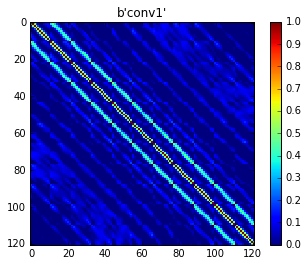

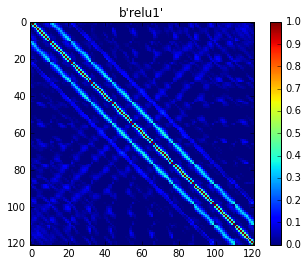

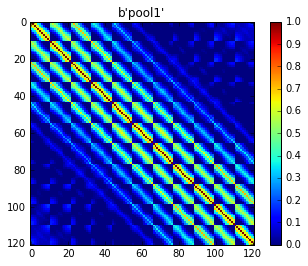

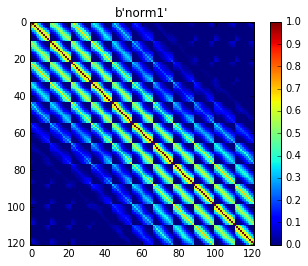

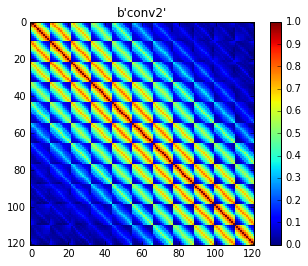

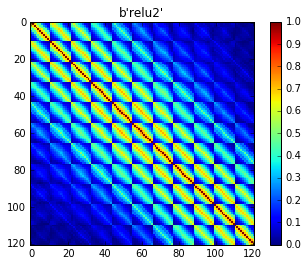

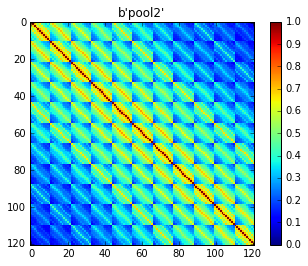

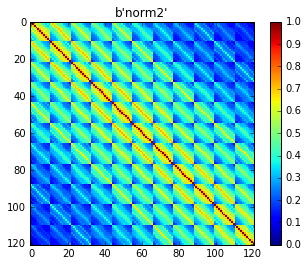

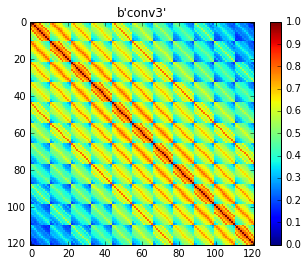

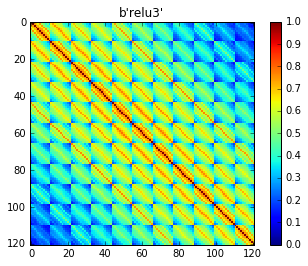

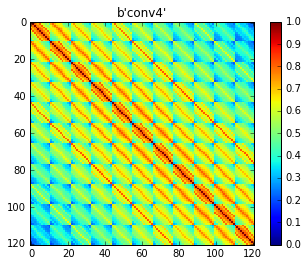

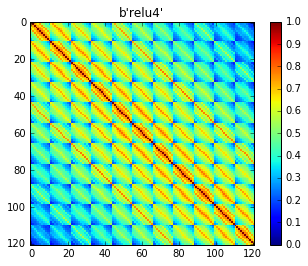

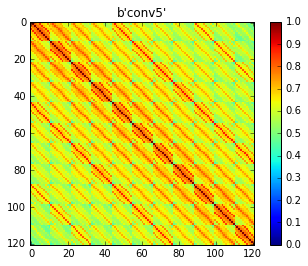

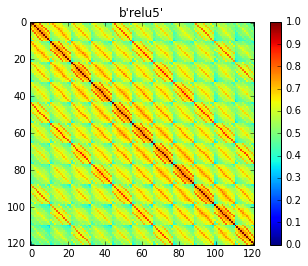

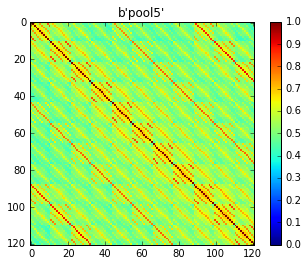

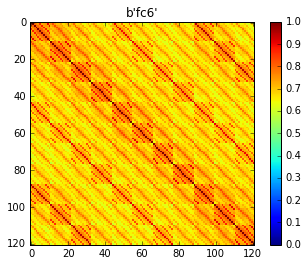

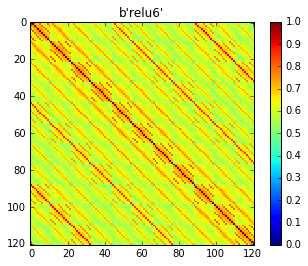

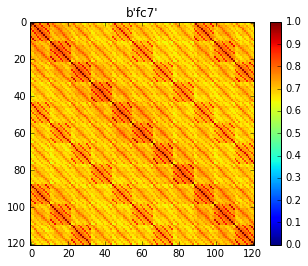

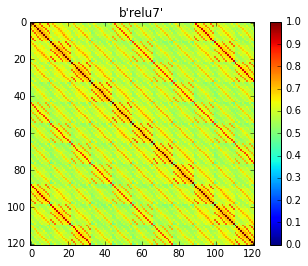

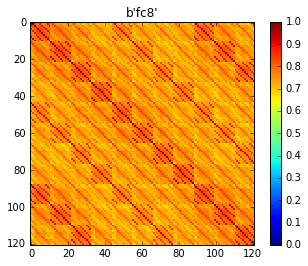

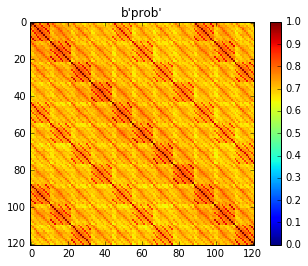

In [65]:
for j, layer in enumerate(np.sort(np.unique(layers))):
    plt.figure()
    plt.imshow(cov_avs[j], interpolation='nearest',vmin=0, vmax=1)
    plt.colorbar()
    layer_ind = layer == layers
    layer_label = layer_labels[layer_ind][0]
    plt.title(layer_label)


In [6]:
def ti_av_cov(da):
-
    return ti, kurt_shapes, kurt_x, dens, nums, tot_vars

In [5]:
ti, kurt_shapes, kurt_x, dens, nums, tot_vars = ti_av_cov(da[::,:,5,:])

NameError: name 'ti_av_cov' is not defined

Cells with zero TI: 3865
Cells with no response variation: 3625
Cells with response variation but no covariance: 240
Example Cells:


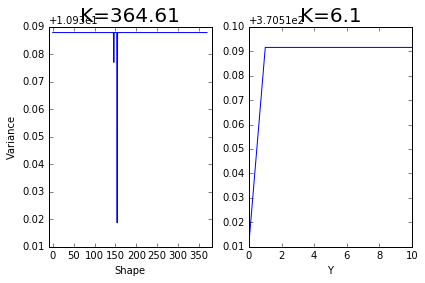

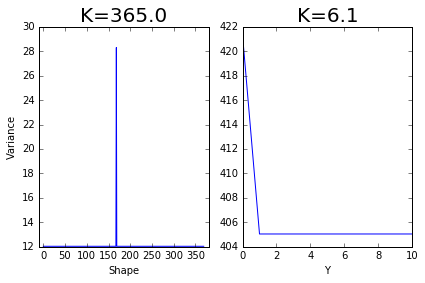

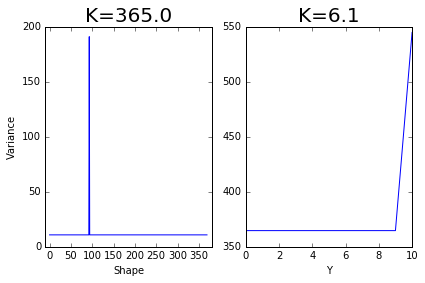

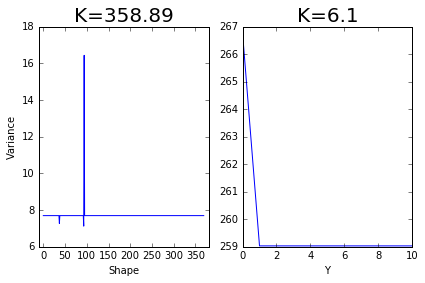

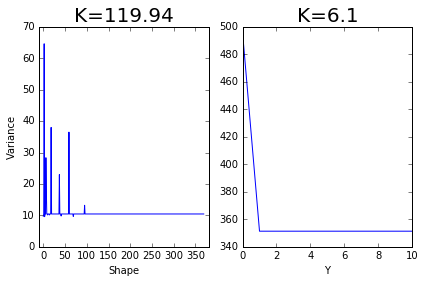

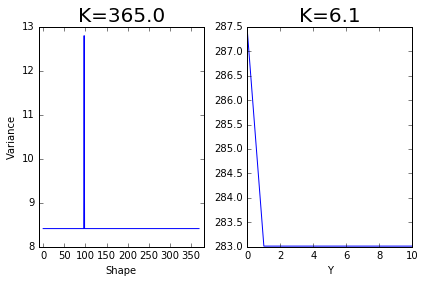

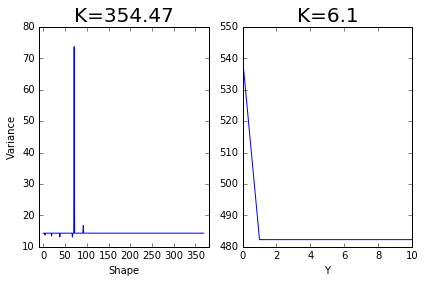

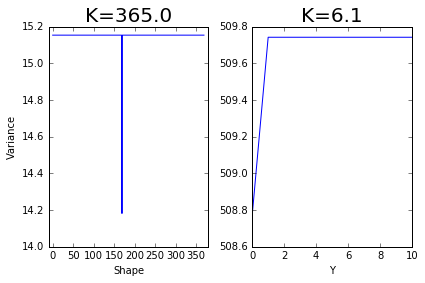

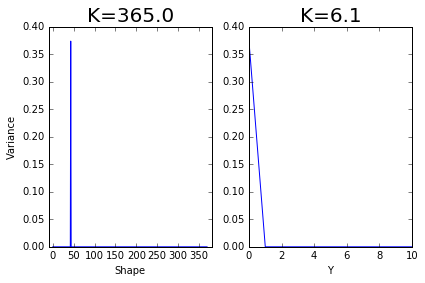

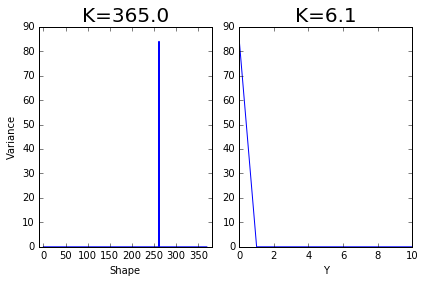

In [68]:
print('Cells with zero TI: ' +str(sum(ti==0)))
print('Cells with no response variation: ' +str(sum(tot_vars==0)))
print('Cells with response variation but no covariance: ' + str(sum((nums==0)*(tot_vars>0))))
print('Example Cells:')
for ind, _ in zip(range(sum((nums==0)*(tot_vars>0))), range(10)):
    plt.figure()
    plt.subplot(121)
    plt.plot(np.sum(da[(nums==0)*(tot_vars>0),:, 5 , :][ind]**2, 1))
    plt.title('K=' + str(np.round(kurt_shapes[(nums==0)*(tot_vars>0)][ind], 2)), fontsize=20)

    plt.ylabel('Variance')
    plt.xlabel('Shape')
    plt.xlim(-10, 380)
    
    
    plt.subplot(122)
    plt.plot(np.sum(da[(nums==0)*(tot_vars>0),:, 5 , :][ind]**2, 0))
    plt.title('K=' + str(np.round(kurt_x[(nums==0)*(tot_vars>0)][ind], 2)), fontsize=20)
    #plt.ylabel('Variance')
    plt.xlabel('Y')
    plt.tight_layout()


The cells that have variance but no co-variance are vary sparse with mostly zeros, the easiest way for the responses to be orthogonal

Cells with perfect TI: 42


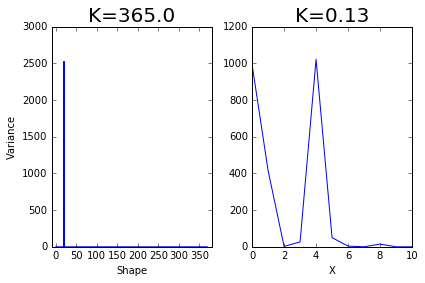

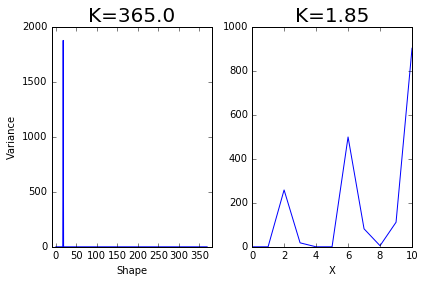

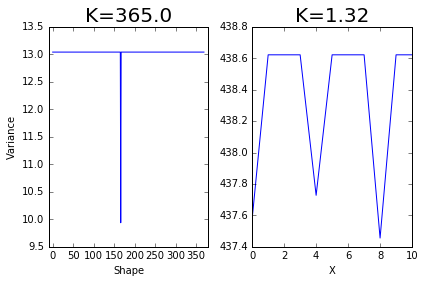

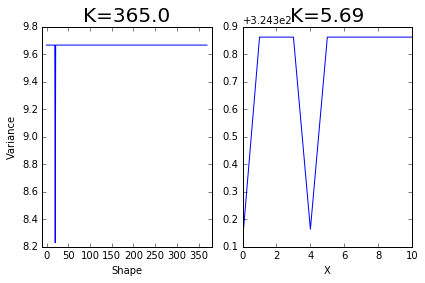

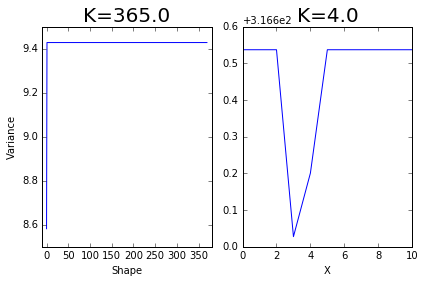

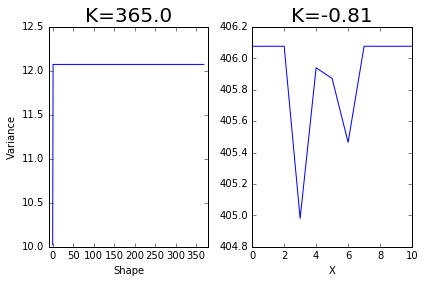

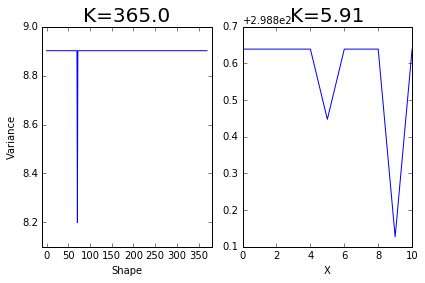

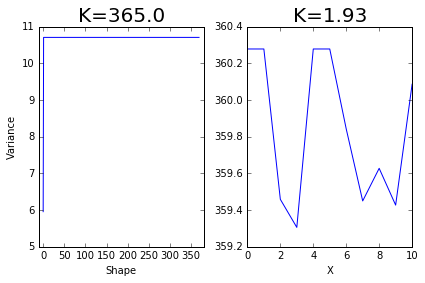

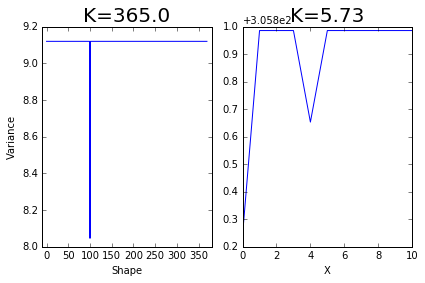

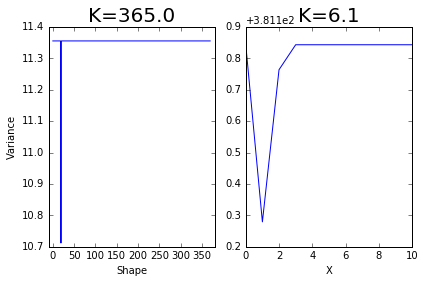

In [69]:
print('Cells with perfect TI: ' + str(sum(ti>=1)))

for ind, _ in zip(range(sum(ti>=1)), range(10)):
    plt.figure()
    plt.subplot(121)
    da[(nums==0)*(tot_vars>0),:, 5 , :]
    plt.plot(np.sum(da[ti>=1, :, 5, :][ind]**2, 1))
    plt.title('K=' + str(np.round(kurt_shapes[ti>=1][ind], 2)), fontsize=20)

    plt.ylabel('Variance')
    plt.xlabel('Shape')
    plt.xlim(-10, 380)
    
    
    plt.subplot(122)
    plt.plot(np.sum(da[ti>=1, :, 5, :][ind]**2, 0))
    plt.title('K=' + str(np.round(kurt_x[ti>=1][ind], 2)), fontsize=20)
    #plt.ylabel('Variance')
    plt.xlabel('X')
    plt.tight_layout()

In [7]:
#%%
ti_x, kurt_shapes_x, kurt_x, dens, nums, tot_vars_x = ti_av_cov(da[:,:,:, 5])
ti_y, kurt_shapes_y, kurt_y, dens, nums, tot_vars_y = ti_av_cov(da[:,:, 5, :])
ti_yx, kurt_shapes_yx, kurt_yx, dens, nums, tot_vars_yx = ti_av_cov(da[:, :, :, :])

In [8]:
non_k_var = (kurt_shapes_y<42) * (kurt_shapes_x<42) * (kurt_x<6) * (kurt_y<6) * (tot_vars_x>0) * (tot_vars_y>0)

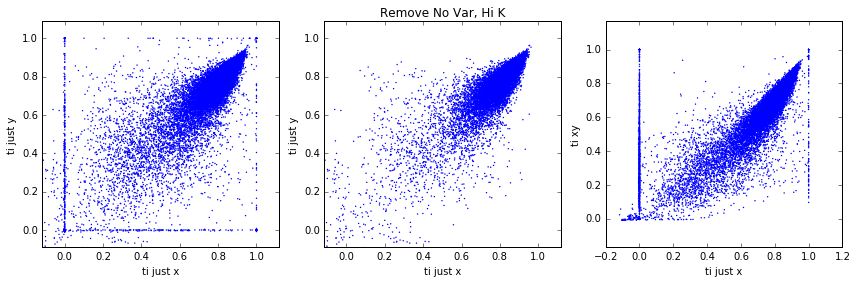

In [9]:
plt.figure(figsize=(12,4))
ax = plt.subplot(131)
ax.scatter(np.array(ti_x), np.array(ti_y),s=2, edgecolors='none')
ax.set_xlabel('ti just x')
ax.set_ylabel('ti just y')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.axis('equal')


ax = plt.subplot(132)
ax.scatter(np.array(ti_x[non_k_var]), np.array(ti_y[non_k_var]),s=2, edgecolors='none')
ax.set_xlabel('ti just x')
ax.set_ylabel('ti just y')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.axis('equal')
plt.title('Remove No Var, Hi K')
plt.tight_layout()

ax = plt.subplot(133)
ax.scatter(np.array(ti_x), np.array(ti_yx),s=2, edgecolors='none')
ax.set_xlabel('ti just x')
ax.set_ylabel('ti xy')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.axis('equal')
plt.tight_layout()

/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[array([-0.04400789,  0.51872524]), array([-0.00581146,  0.77023956]), array([-0.0477309 ,  0.70574306]), array([ 0.12250707,  0.72863642]), array([ 0.2281629 ,  0.71671552]), array([ 0.28931519,  0.74086426]), array([ 0.42848778,  0.77242614]), array([ 0.59646549,  0.81287666]), array([ 0.71296938,  0.87643413]), array([ 0.82799529,  0.92119693])]


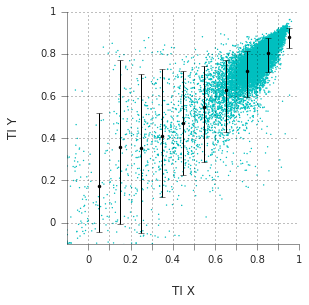

In [103]:
ti_x_f = ti_x[non_k_var]
ti_y_f = ti_y[non_k_var]
n_intervals = 10.
interval_space = 1/n_intervals
intervals = np.linspace(0, 1-interval_space, n_intervals)

c_means_x = []
c_means_y = []
c_sd_x = []
c_sd_y = []

for interval in intervals:
    cond_y = ti_y_f[(ti_x_f>interval)*(ti_x_f<=interval+interval_space)]
    cond_x = ti_x_f[(ti_y_f>interval)*(ti_y_f<=interval+interval_space)]
    c_means_x.append(np.mean(cond_x))
    c_means_y.append(np.mean(cond_y))
    c_sd_x.append(np.percentile(cond_x, [5, 95]))
    c_sd_y.append(np.percentile(cond_y, [5, 95]))


c_sd_y_err = np.abs((np.array(c_sd_y) - np.array(c_means_y).reshape(n_intervals,1)).T)
c_sd_x_err = np.abs((np.array(c_sd_x) - np.array(c_means_x).reshape(n_intervals,1)).T)

plt.axis('square')
fs = 12
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.errorbar(intervals+interval_space/2, c_means_y, yerr=c_sd_y_err, color='k',fmt='.')
plt.scatter(ti_x_f, ti_y_f, s=2,  c='c', edgecolors='none')
plt.xlabel('TI X', fontsize=fs)
plt.ylabel('TI Y', fontsize=fs)
plt.tight_layout()
print(intervals)
plt.xticks(np.linspace(0,1,11))
plt.gca().set_xticklabels(['0','','0.2','','0.4','','0.6', '','0.8','', '1'])
plt.yticks([0,0.2,0.4,0.6, 0.8, 1])
plt.gca().set_yticklabels(['0','0.2','0.4','0.6', '0.8', '1'])

#from matplotlib.ticker import AutoMinorLocator
#minor_locator = AutoMinorLocator(2)
#plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(True, which='both')
beautify(plt.gca())
plt.savefig(top_dir + 'analysis/figures/images/v4cnn_cur/ti_x_vs_y.pdf' )
print(c_sd_y)

/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


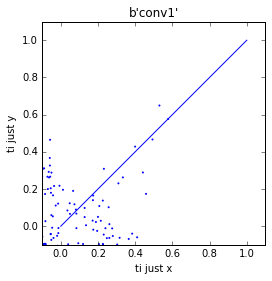

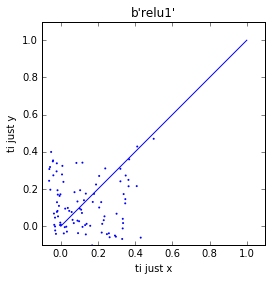

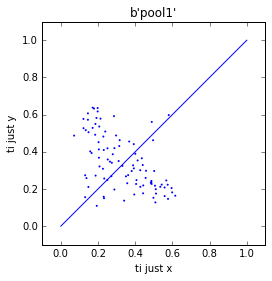

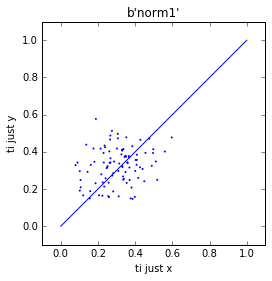

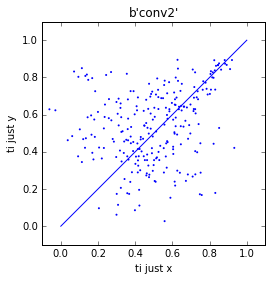

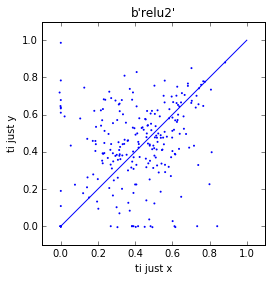

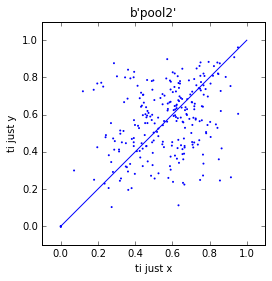

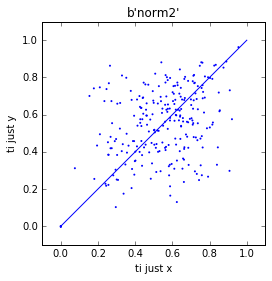

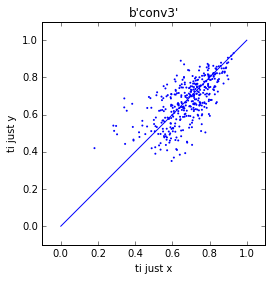

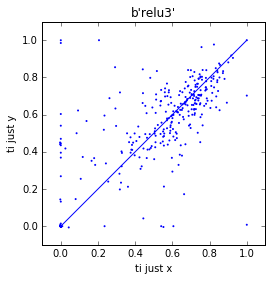

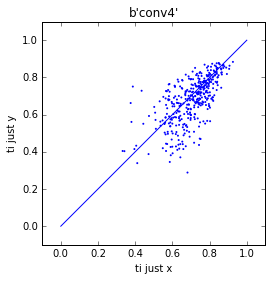

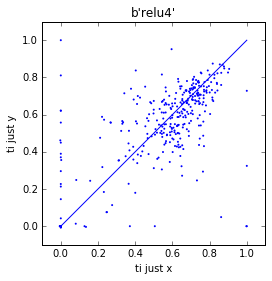

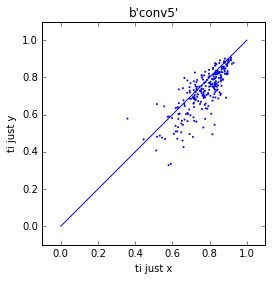

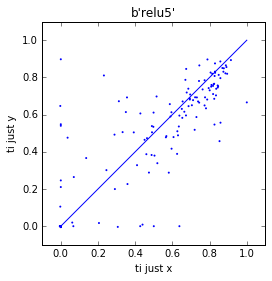

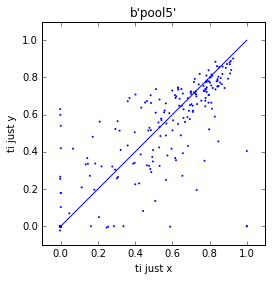

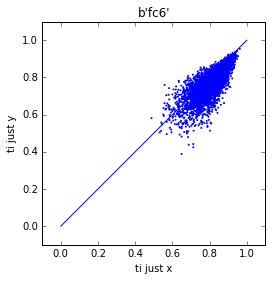

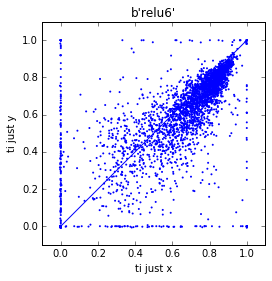

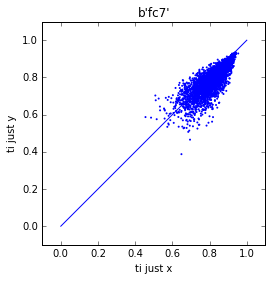

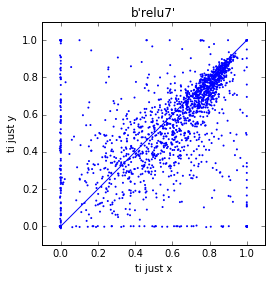

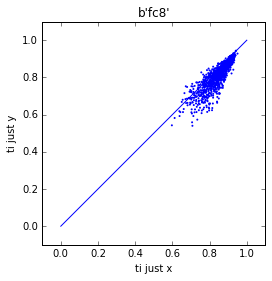

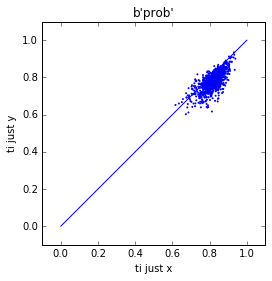

In [72]:
layers = da.coords['layer'].values
layer_labels = da.coords['layer_label'].values

for layer in np.sort(np.unique(layers)):
    layer_ind = layer == layers
    layer_label = layer_labels[layer_ind][0]
    plt.figure()
    plt.scatter(np.array(ti_x[layer_ind]), np.array(ti_y[layer_ind]),s=4, edgecolors='none')
    plt.title(layer_label)
    plt.plot([0,1],[0,1])

    plt.xlabel('ti just x')
    plt.ylabel('ti just y')
    plt.axis('square')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)

/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


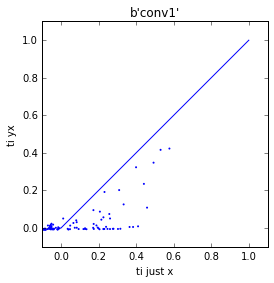

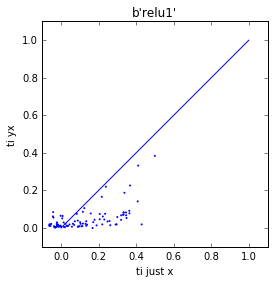

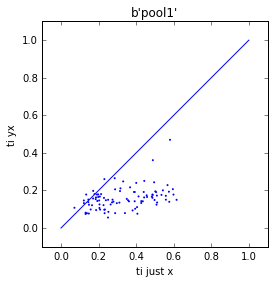

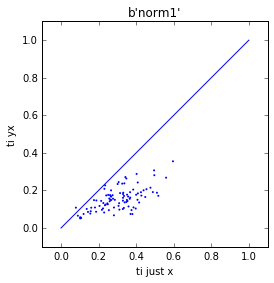

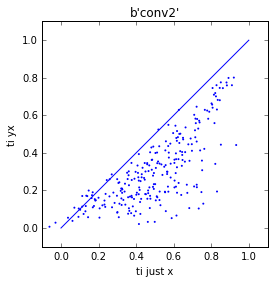

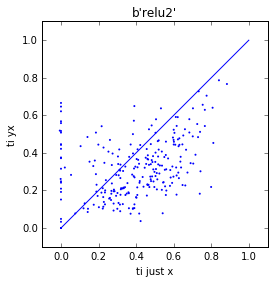

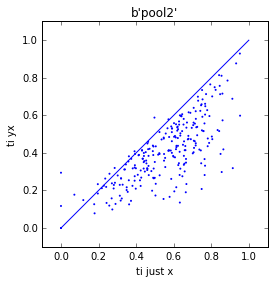

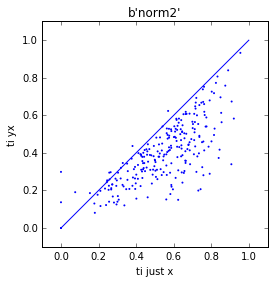

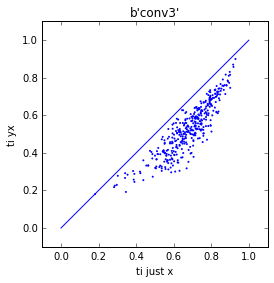

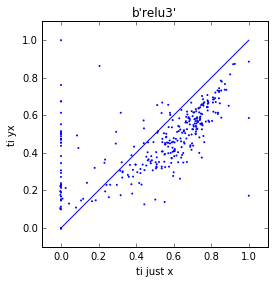

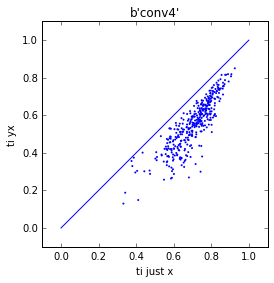

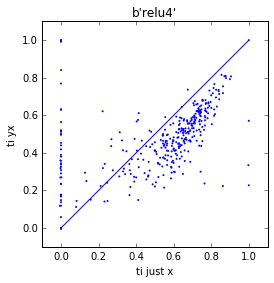

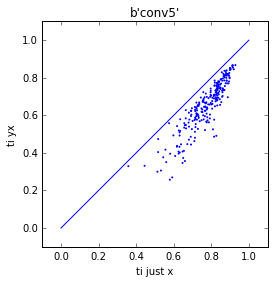

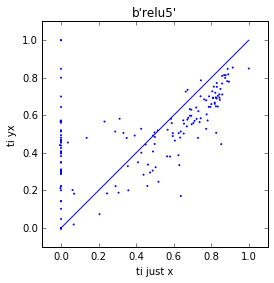

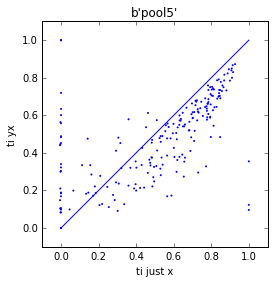

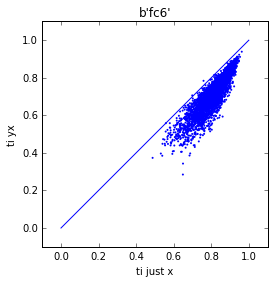

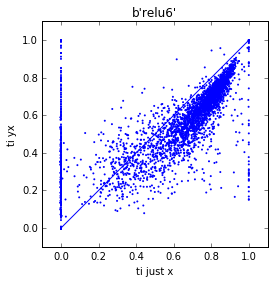

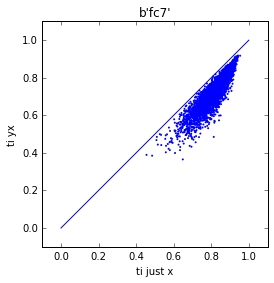

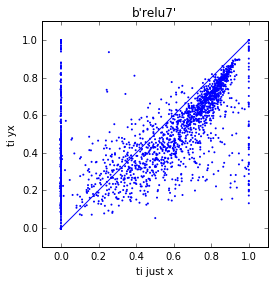

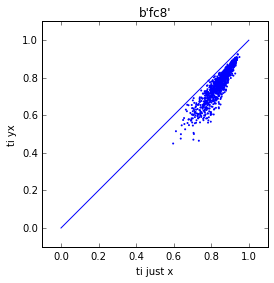

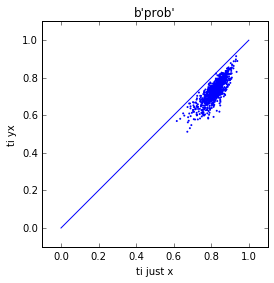

In [73]:
for layer in np.sort(np.unique(layers)):
    layer_ind = layer == layers
    layer_label = layer_labels[layer_ind][0]
    plt.figure()
    plt.scatter(np.array(ti_x[layer_ind]), np.array(ti_yx[layer_ind]),s=4, edgecolors='none')
    plt.title(layer_label)
    plt.plot([0,1],[0,1])
    plt.xlabel('ti just x')
    plt.ylabel('ti yx')
    plt.axis('square')
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.tight_layout()
